In [3]:
# 기본 패키지 추가
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import scipy as sp 
import matplotlib as mpl

# matplolib, 폰트설정
from matplotlib import rc
import matplotlib.font_manager as fm 

plt.rcParams['font.family']=['NanumBarunGothic.ttf']
plt.rcParams['font.size']=14
# plt.rc('font', family ='NanumSquareRoundR')
sns.set(font = 'Malgun Gothic' ,rc={'axes.unicode_minus':False}, style='darkgrid')

#### MNIST 다운로드

In [4]:
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [5]:
(train_input,train_target),(test_input,test_target) = load_data()

In [6]:
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [11]:
train_scaled = train_input.reshape(-1,28,28,1)/255.0

In [12]:
def show_images(dataset,label,nrow,ncol):
     #캔버스설정
     fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(2*ncol,2*nrow),facecolor='w')
     ax = axes.ravel()

     xlabels = label[0:nrow*ncol]
     for i in range(nrow*ncol):
          image = dataset[i]
          ax[i].imshow(image,cmap='gray_r')
          ax[i].set_xticks([])
          ax[i].set_yticks([])
          ax[i].set_xlabel(xlabels[i])
     
     plt.tight_layout()
     plt.show()

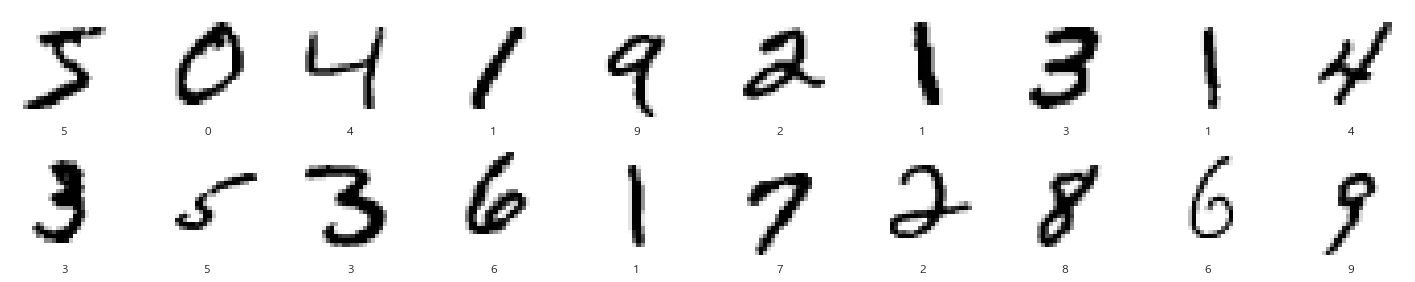

In [13]:
show_images(train_input,train_target,2,10)

In [14]:
model = keras.Sequential(name='CNN')
model.add(keras.layers.Conv2D(32,kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2)) #14*14 특성맵 =32개 만들어진다.
model.add(keras.layers.Conv2D(64,kernel_size=3, activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D(2))  # 7*7 특성맵 64개

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu', name='hidden'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax',name='output'))
model.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 hidden (Dense)              (None, 1000)              3137000 

In [15]:
# 255.0으로 나눠서 0~1로 값을 축소하는 작업 안해
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_cnn_model2.h5',save_best_only=True,verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history=model.fit(train_input,train_target,epochs=20, verbose=1, validation_data=(test_input,test_target),batch_size=100,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
600/600 [==============================] - ETA: 0s - loss: 0.8669 - accuracy: 0.9377
Epoch 1: val_loss improved from inf to 0.06300, saving model to ./data\best_cnn_model2.h5
600/600 [==============================] - 54s 89ms/step - loss: 0.8669 - accuracy: 0.9377 - val_loss: 0.0630 - val_accuracy: 0.9799
Epoch 2/20
600/600 [==============================] - ETA: 0s - loss: 0.0605 - accuracy: 0.9810
Epoch 2: val_loss improved from 0.06300 to 0.04695, saving model to ./data\best_cnn_model2.h5
600/600 [==============================] - 56s 93ms/step - loss: 0.0605 - accuracy: 0.9810 - val_loss: 0.0470 - val_accuracy: 0.9847
Epoch 3/20
600/600 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9864
Epoch 3: val_loss did not improve from 0.04695
600/600 [==============================] - 57s 94ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0477 - val_accuracy: 0.9850
Epoch 4/20
600/600 [==============================] - ETA: 0s - loss: 0.0378 - acc

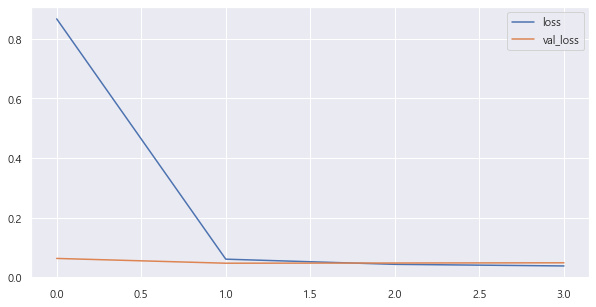

In [16]:

plot_target = ['loss','val_loss']
plt.figure(figsize=(10,5))

for each in plot_target:
     plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

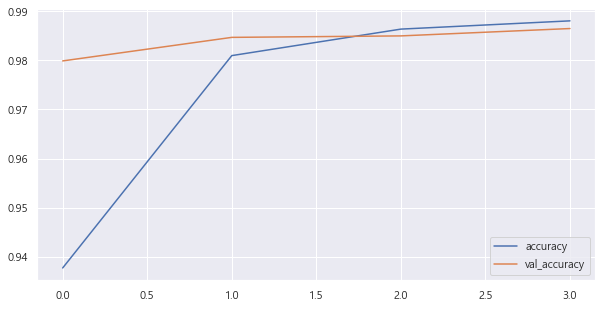

In [17]:
plot_target = ['accuracy','val_accuracy']
plt.figure(figsize=(10,5))

for each in plot_target:
     plt.plot(history.history[each], label=each)
plt.legend()
plt.show()

In [18]:
model.evaluate(test_input, test_target)

313/313 [==============================] - 4s 11ms/step - loss: 0.0470 - accuracy: 0.9847


[0.04695463553071022, 0.9847000241279602]

In [19]:
# 예측된 결과값 리스트 
pred_result = model.predict(test_input)


313/313 [==============================] - 3s 10ms/step


In [20]:
pred_labels = np.argmax(pred_result, axis=-1)
pred_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

#### 예측 실패 이미지 파악

In [21]:
wrong_result = []

for i in range(0,len(test_target)):
     if pred_labels[i] != test_target[i]:
          wrong_result.append(i)

len(wrong_result)

153

In [22]:
import random

samples = random.choices(population=wrong_result, k=16)
len(samples)

16

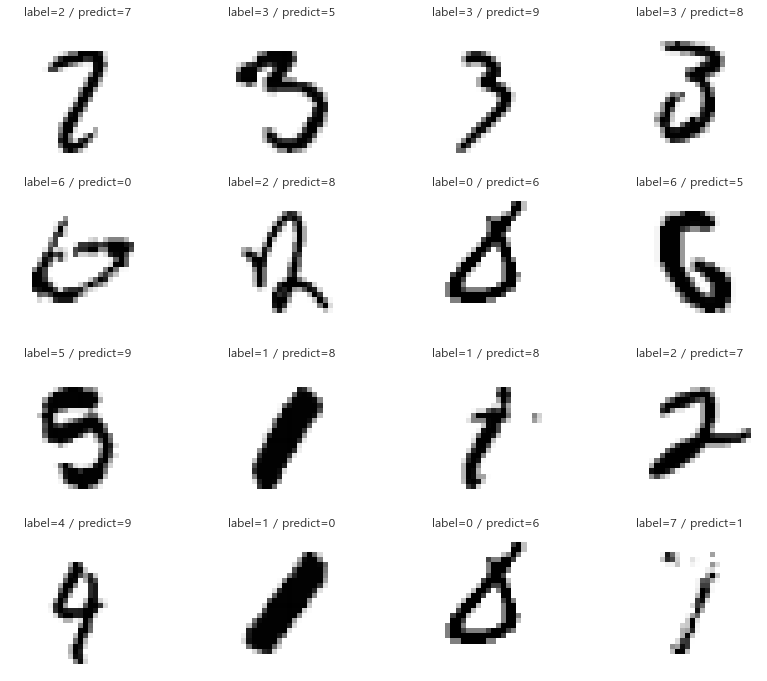

In [23]:
# 예측실패한 이미지 확인

plt.figure(figsize=(14,12))
for idx,n in enumerate(samples):
     plt.subplot(4,4, idx+1)
     plt.imshow(test_input[n].reshape(28,28),cmap='gray_r',interpolation='nearest')
     plt.title(f'label={test_target[n]} / predict={pred_labels[n]}')
     plt.axis('off')

plt.show()